### Содержание:

<a name="0.0"></a>
* [Описание проекта](#0.)
    - [Описание данных](#0.1.)
    - [Задачи проекта (план работы)](#0.2.)
* [Шаг 1. Открываем файл и изучаем общую информацию](#1.)
    - [Импорт библиотек](#1.1.)
    - [Изучаем общую информацию](#1.2.)
    - [Вывод](#1.3.)
* [Шаг 2. Подготавливаем данные](#2.)
    - [Обрабатываем пропуски](#2.2.)
    - [Вывод](#2.3.)
* [Шаг 3. Проводим исследовательский анализ данных](#3.)
    - [Вывод](#3.4.)
* [Шаг 4. Составляем портрет пользователя каждого региона](#4.)
    - [Вывод](#4.1.)
* [Шаг 5. Проверка гипотез](#5.)
    - [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#5.1.)
    - [Средние пользовательские рейтинги жанров Action и Sports разные](#5.2.)
    - [Вывод](#5.3.)
* [Шаг 6. Общие выводы](#6.)

### Описание проекта: 

Необходимо проанализировать данные о продаже компьютерных игр в 2016 году, выявить определяющие успешность игры закономерности, дать прогноз относительно игровых продуктов, которые должны пользоваться спросом среди геймеров в будущем. 

### Задачи проекта (план работы):

<a name="0.2."></a>

- Импортировать данные, ознакомиться с ними
- Выявить столбцы, в которых есть наиболее количество пропусков, объяснить причины пропусков в данных
- Подготовить данные для работы, привести названия столбцов к нижнему регистру
- Ознакомиться с списком платформ и существующих рейтингов 
- Обработать имеющиеся пропуски, заполнить их данными, избавиться от не нужных столбцов
- Преобразовать данные в нужные типы для удобства работы с ними
- Проанализировать соотношение игр с оценкой и без оценки, отметить динамику изменений этого соотношения за анализируемые период 
- Сделать промежуточные выводы
- Провести исследовательский анализ данных
- Проанализировать суммарные объемы продаж (по годам, по платформам)
- Проанализировать продажи наиболее популярных платформ по годам
- Определить период высокого спроса для каждой из платформ
- Определяем потенциально прибыльные платформы, визуализируем данные
- Сортируем платформы по объёму суммарных продаж 
- Проанализировать продажи по всем годам для всех платформ
- Сделать промежуточные выводы после проведенного исследовательского анализа данных
- Составить портрет пользователя из каждого региона
- Определить топ-5 платформ в Северной Америке, Европе, Японии, других странах
- Визуализировать полученную статистику
- Выявить наиболее популярные жанры (топ-5) в Северной Америке, Европе, Японии, других странах
- Визуализировать полученные данные
- Сделать промежуточные выводы
- Проверить гипотезы, используя стандартный t-тест
	1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
	2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Описать общие выводы по проекту

<font size="2">([Назад](#0.0))</font>

### Описание данных:

<a name="0.1."></a>
Name — название игры <br>
Platform — платформа<br>
Year_of_Release — год выпуска<br>
Genre — жанр игры<br>
NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
EU_sales — продажи в Европе (миллионы проданных копий)<br>
JP_sales — продажи в Японии (миллионы проданных копий)<br>
Other_sales — продажи в других странах (миллионы проданных копий)<br>
Critic_Score — оценка критиков (максимум 100)<br>
User_Score — оценка пользователей (максимум 10)<br>
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>
Данные за 2016 год могут быть неполными.

<font size="2">([Назад](#0.0))</font>

### <a name="1."></a>
# Шаг 1. Открываем файл и изучаем общую информацию
<font size="2">([Назад](#0.0))</font>

<a name="1.1."></a>
## Импорт библиотек

<font size="2">([Назад](#0.0))</font>

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from datetime import datetime

# import warnings
# warnings.simplefilter(action="ignore", category=FutureWarning)

# pd.set_option('display.max_rows', 5001) 


In [2]:
# подгружаю данные
try:
    data=pd.read_csv('games.csv')
except:
    data=pd.read_csv('/datasets/games.csv')

<a name="1.2."></a>
## Изучаем общую информацию

<font size="2">([Назад](#0.0))</font>

In [3]:
# Ознакомимся с данными
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Количество уникальных названий игр в базе данных
len(data['Name'].unique())

11560

In [7]:
# Количество выпущенных игр на разных платформах
data['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [8]:
# Количество выпущенных игр различных жанров
data['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [9]:
# Оценки игроков
data['User_Score'].value_counts(dropna=False)

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: User_Score, Length: 97, dtype: int64

In [10]:
# Оценки критиков
data['Critic_Score'].value_counts(dropna=False)

NaN     8578
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
20.0       3
21.0       1
17.0       1
22.0       1
13.0       1
Name: Critic_Score, Length: 83, dtype: int64

In [11]:
# Количество выпущенных для различных возрастных групп
data['Rating'].value_counts(dropna=False)

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [12]:
# Проверка на дубликаты
data.duplicated().sum()

0

In [13]:
data_name_repeated = data[["Name", "Platform"]]
data_name_repeated.duplicated('Name').sum()

5155

Было выявлено 5155 повторов. Это связано с тем, что одни и те же игры выпускаются на различных платформах.</font></h5>    

</div> 

### Вывод

<a name="1.3."></a>
Нам предстоит проанализировать данные из двумерной таблцы (16715 x 11), предположить причины возникновения пропусков (наиболее количество пропусков есть в столбцах “Critic_Score” и “Rating”. Должно быть, что это связано с тем, что не для всех игр была возможность сформировать рейтинг, так как старые игры потеряли свою актуальность и не пользуются большим спросом у геймеров, а вновь вышедшие игры ещё не успели получить обзор от критиков. Также, можно отметить, что большое количество нулевых значений обнаружено в столбце с количеством проданных копий. <br>

Было выявлено 11560 уникальных названий игр. Наибольшее количество игр было выпущено для PS2, DS, PS3, Wii, X360. Наиболее популярными жанрами среди геймеров являются Action, Sports, Music. Выявлено 2424 записи tbd среди оценок пользователей. Подавляющее количество игр производится для возрастных групп: E, T, M. Дубликаты отсутствуют. 
<font size="2">([Назад](#0.0))</font>

Американское рейтинговое агенство заинтересовано в играх, которые популярны на территории Америки и Канады.</font></h5>  
    
В данных присутствует информация о компьютерных играх, выпущенных за период с 1980 по 2016 года, причем преобладает количество игр, выпущенных после 2000 года. Количество значений в столбцах продаж одинаковое, скорее всего пропуски содержаться в одних и тех же строках, значения варьируются от десятков тысяч до десятков миллионов (за игру). В столбцах Critic_Score, User_Score и Rating около половины пропущенных данных, это может быть связано с тем, что при первых играх не устанавливали различные рейтинги и отзывы, а также то, что непопулярные игры не привлекают внимания ни пользователей, ни критиков.

</div> 

<a name="2."></a>
# Шаг 2. Подготавливаем данные

<font size="2">([Назад](#0.0))</font>

<a name="2.1."></a>
## Приводим названия столбцов к нижнему регистру
<font size="2">([Назад](#0.0))</font>

In [14]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [15]:
# Список уникальных платформ
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [16]:
# Список уникальных рейтингов
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
# Найдём игры без названия
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<a name="2.2."></a>
## Обрабатываем пропуски
<font size="2">([Назад](#0.0))</font>

In [18]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [19]:
data.shape

(16715, 11)

In [20]:
# Найдём игры без названия, удалим эти строки
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [21]:
data.dropna(subset=['name'], inplace=True)

In [22]:
data.shape

(16713, 11)

In [23]:
data.reset_index(drop=True,inplace=True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [25]:
 # Не у всех игр указан год выпуска
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [26]:
data.loc[data['user_score'] == 'tbd','user_score'] = -1
data['user_score'].fillna(-1, inplace=True)
data['rating'].fillna(-1, inplace=True)
data['critic_score'].fillna(-1, inplace=True)

Преобразуем типы данных для удобства работы

In [27]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')
data['user_score'] = data['user_score'].astype('float64')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  Int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


In [29]:
# Маркеры для дальнейшего анализа
year_of_release_mark = 'year_of_release != -1'
critic_score_mark = 'critic_score != -1'
user_score_mark = 'user_score != -1'

### Вывод

<a name="2.3."></a>
Мы выяснили, что в наших данных есть 11560 уникальных названий игр. Остальные строки являются повторами, так игры выходят на различных платформах. Было удалено две строки, в которых были игры без названия. <br>

Есть 269 пропусков среди года выпуска игры, но этим можно пренебречь, так как это всего лишь 1,6% от общего количества данных. Значение tbd расшифровывается очень просто - To Be Determined, то есть "Будет определено”, (выявлено 2424 таких записей, присвоено значение NaN). 
Остальные пропуски данных не было возможности заполнить корректными значениями. 

<font size="2">([Назад](#0.0))</font>

<a name="3."></a>
# Шаг 3. Проводим исследовательский анализ данных

<font size="2">([Назад](#0.0))</font>

- Суммарные продажи во всех регионах, записанные в отдельный столбец.

In [30]:
data['total_sales'] = data.loc[:,['na_sales', 'eu_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,111.50
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,-1,43.82
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,48.28
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,43.70
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,-1,40.27


Обращаем внимание на то сколько игр выпускалось в разные годы. Выделяем временной промежуток, которые наиболее актуален для анализа. 

In [31]:
games_per_year = data
games_per_year = (
    games_per_year[['name', 'year_of_release']]
        .drop_duplicates()
        .pivot_table(index='year_of_release', values='name', aggfunc='count')
        .sort_values('year_of_release', ascending=False)
)

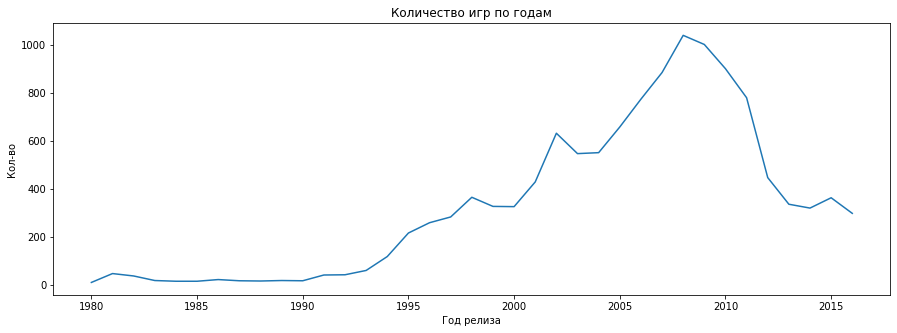

In [32]:
(
    games_per_year
        .plot(legend=False,title='Количество игр по годам', figsize=(15,5))
        .set(xlabel='Год релиза', ylabel='Кол-во')
)

plt.show()

In [33]:
# Для большей точности вывожу числовые значения выпуска игр по годам
games_per_year.sort_values(by='name', ascending=False).head(100)

,name
year_of_release,
2008,1039
2009,1001
2010,900
2007,884
2011,779
2006,773
2005,657
2002,631
2004,550


Наиболее целесообразным будет рассмотреть период с 2012. Именно анализ этого промежутка времени поможет нам построить прогнозы на 2017 год.

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [34]:
total_sales_per_platform = (data.groupby(['platform'],as_index = False)['total_sales'].sum()
                                 .sort_values('total_sales',ascending = False)
                           )

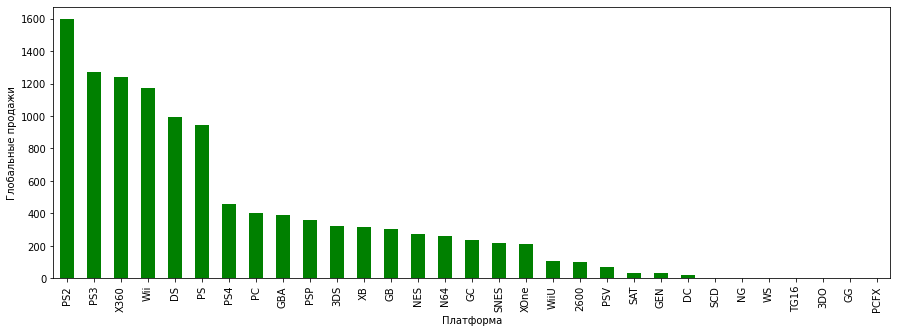

In [35]:
(total_sales_per_platform.plot(kind='bar',x='platform', y='total_sales',figsize=(15, 5),legend=False, color='g')
                         .set(xlabel='Платформа', ylabel='Глобальные продажи')
)
plt.show()

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ**

In [36]:
# Анализируем данные за последние пять лет
actual_platforms = data.query('year_of_release >= 2012')
actual_platforms_search = (actual_platforms.groupby(['platform'],as_index = False)['total_sales'].sum()
                                 .sort_values('total_sales',ascending = False)
                           )
actual_platforms_search

,platform,total_sales
4,PS4,455.23
3,PS3,395.65
9,X360,311.06
0,3DS,237.25
10,XOne,210.91
8,WiiU,107.32
2,PC,100.41
6,PSV,60.54
7,Wii,47.29
1,DS,16.08


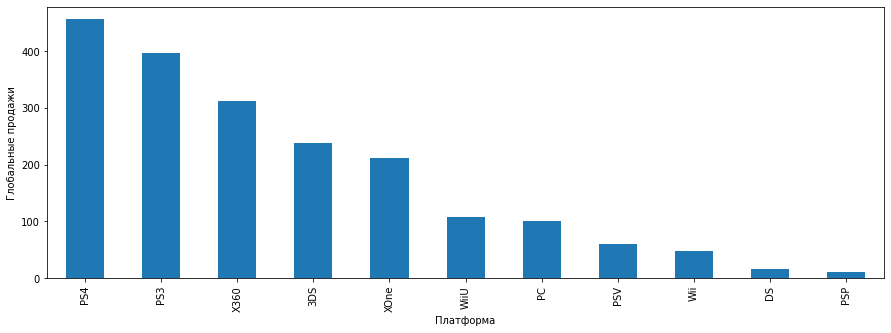

In [37]:
(actual_platforms_search.plot(kind='bar',x='platform', y='total_sales',figsize=(15, 5),legend=False)
                         .set(xlabel='Платформа', ylabel='Глобальные продажи')
)
plt.show()

**Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.**

[(0.0, 0.85)]

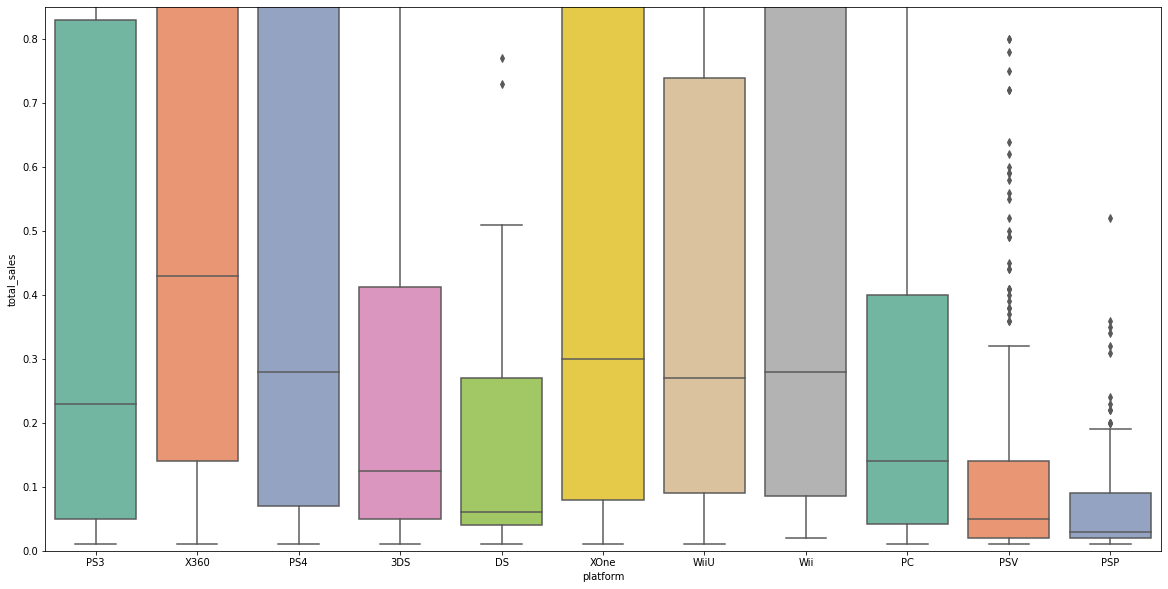

In [38]:

plt.figure(figsize=(20,10))
ax = sns.boxplot(x="platform", y="total_sales", data=actual_platforms, palette="Set2")
ax.set(ylim=(0, 0.85))

In [39]:
actual_platfroms_total_sales = actual_platforms[['platform','total_sales']]
actual_platfroms_total_sales.pivot_table(columns=["platform"], aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
total_sales,237.25,16.08,100.41,395.65,455.23,11.61,60.54,47.29,107.32,311.06,210.91


**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

In [40]:
ps4 = actual_platforms.query("platform == 'PS4'")

In [41]:
ps_4_analysis = ps4.query(f"{critic_score_mark and user_score_mark}")

In [42]:
features = ['user_score', 'critic_score', 'total_sales']

cmap= sns.light_palette("seagreen", as_cmap=True)
ps_4_analysis[features].corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '200px', 'font-size': '12pt'})\
    .set_precision(2)

/var/folders/kp/79zkfj3d33d9c72zqf_lzxvm0000gn/T/ipykernel_6633/182286615.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(2)


,user_score,critic_score,total_sales
user_score,1.00,0.39,-0.04
critic_score,0.39,1.00,0.34
total_sales,-0.04,0.34,1.00


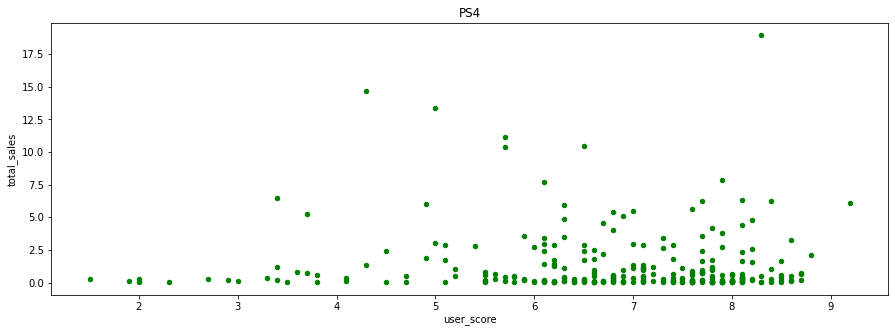

In [43]:
ps_4_analysis.plot(x='user_score', y='total_sales', kind='scatter', title='PS4',figsize=(15, 5), color='g')
plt.show()

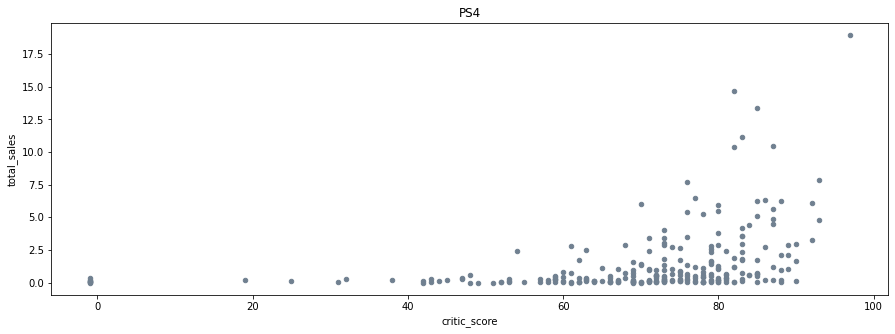

In [44]:
ps_4_analysis.plot(x='critic_score', y='total_sales', kind='scatter', title='PS4',figsize=(15, 5), color='slategrey')
plt.show()

###### Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют. 


**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

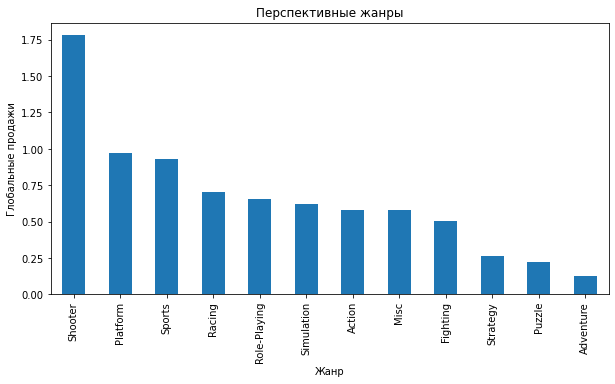

In [45]:
(actual_platforms
    .pivot_table(index='genre', values='total_sales')
    .sort_values('total_sales', ascending=False)
    .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False,title = 'Перспективные жанры')
    .set(xlabel='Жанр', ylabel='Глобальные продажи'))

plt.show()

В числе наиболее популярных жанров оказались Shooter, Platform, Sports, Racing. Наименьшей популярностью пользуются игры в жанрах Puzzle, Strategy и Adventure.

### Вывод

<a name="3.4."></a>
Медианное время жизни платформы составляет около 10 лет. К 2016 году заметно потеряли свою популярность такие платформы как Xbox360, Wii, DS, PS3, в то время как PS4 увеличила свои продажи. Можно заметить, что жизненный цикл портативных платформ отличается в меньшую сторону (Nintendo 3ds, PSP, PS vita, wiiU) и не стоит рассчитывать, что к этим девайсам вернётся популярность в будущем. Конкурентоспособными платформами являются PS4, 3ds, xbox one, PC, wiiU. Наиболее популярной платформой на тот момент является PS4,  именно ей стоит уделить особое внимание во время анализа. <br>

В числе наиболее популярных жанров оказались Shooter, Platform, Sports, Racing. Наименьшей популярностью пользуются игры в жанрах Puzzle, Strategy и Adventure.

<font size="2">([Назад](#0.0))</font>

<a name="4."></a>
# Шаг 4. Составьте портрет пользователя каждого региона

Определяем для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи

<font size="2">([Назад](#0.0))</font>

In [46]:
# Самые популярные платформы (топ-5)
places = ['na_sales',
          'eu_sales',
          'jp_sales',
          'other_sales']
place_name = ['Северной Америке',
              'Европе',
              'Японии', 
              'других странах']
for_visualize=pd.DataFrame()
for place in places:
    print('Топ-5 наиболее популярных платформ в', place_name[places.index(place)],':')
    data_local=data.groupby(
        'platform'
    )[place].sum().sort_values().sort_values(ascending=False)
    result = data_local[:5] / data_local.sum() * 100
    print(result)
    for_visualize = pd.merge(for_visualize, result, how='outer',
                             left_index=True, right_index=True)
    print('-' * 40, end='\n\n')


Топ-5 наиболее популярных платформ в Северной Америке :
platform
X360    13.690726
PS2     13.267372
Wii     11.291719
PS3      8.941796
DS       8.689783
Name: na_sales, dtype: float64
----------------------------------------

Топ-5 наиболее популярных платформ в Европе :
platform
PS2     13.996304
PS3     13.625038
X360    11.169322
Wii     10.816620
PS       8.811785
Name: eu_sales, dtype: float64
----------------------------------------

Топ-5 наиболее популярных платформ в Японии :
platform
DS      13.533075
PS      10.777437
PS2     10.729647
SNES     8.983767
3DS      7.759724
Name: jp_sales, dtype: float64
----------------------------------------

Топ-5 наиболее популярных платформ в других странах :
platform
PS2     24.447702
PS3     17.147768
X360    10.838684
Wii      9.993175
DS       7.489510
Name: other_sales, dtype: float64
----------------------------------------



In [47]:
# Заполним пропуски нулями
for_visualize.fillna(0, inplace=True)

In [48]:
# Взглянем на получившуюся таблицу
for_visualize

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
3DS,0.000000,0.000000,7.759724,0.000000
DS,8.689783,0.000000,13.533075,7.489510
PS,0.000000,8.811785,10.777437,0.000000
PS2,13.267372,13.996304,10.729647,24.447702
PS3,8.941796,13.625038,0.000000,17.147768
SNES,0.000000,0.000000,8.983767,0.000000
Wii,11.291719,10.816620,0.000000,9.993175
X360,13.690726,11.169322,0.000000,10.838684


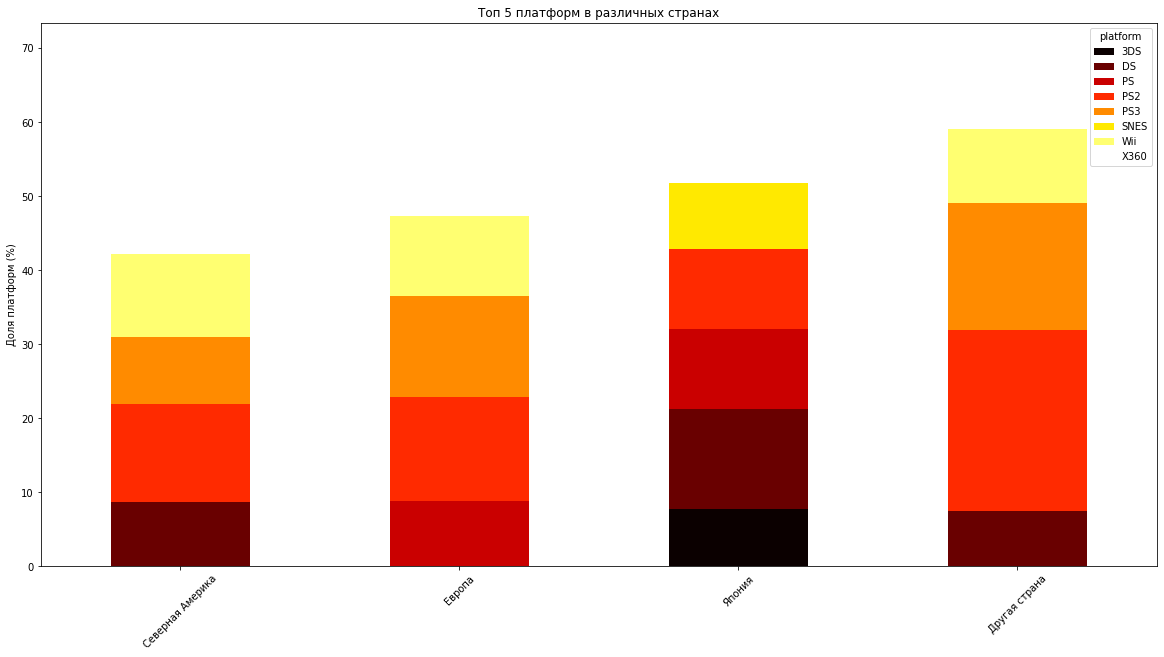

In [49]:
# Визуализируем эту статистику
for_visualize.T.plot(kind='bar', 
                    figsize=(20,10),
                    stacked=True,
                    colormap= 'hot')

plt.title('Топ 5 платформ в различных странах')
plt.ylabel('Доля платформ (%)')
locs, _ = plt.xticks()
plt.xticks(locs, ['Северная Америка', 'Европа', 'Япония', 'Другая страна'], rotation=45)
plt.show()

In [50]:
# Самые популярные жанры
places = ['na_sales',
          'eu_sales',
          'jp_sales',
          'other_sales']
place_name = ['Северной Америке',
              'Европе',
              'Японии',
              'других странах']
for_visualize = pd.DataFrame()
for place in places:
    print('Наиболее популярные Топ-5 жанров в', place_name[places.index(place)],':')
    data_local=data.groupby(
        'genre'
    )[place].sum().sort_values().sort_values(ascending=False)
    result = data_local[:5] / data_local.sum() * 100
    print(result)
    for_visualize = pd.merge(for_visualize, result, how='outer',
                             left_index=True, right_index=True)
    print('-' * 40, end='\n\n')


Наиболее популярные Топ-5 жанров в Северной Америке :
genre
Action      19.974912
Sports      15.553212
Shooter     13.458257
Platform    10.123689
Misc         9.254937
Name: na_sales, dtype: float64
----------------------------------------

Наиболее популярные Топ-5 жанров в Европе :
genre
Action     21.415017
Sports     15.543244
Shooter    13.090828
Racing      9.756450
Misc        8.775896
Name: eu_sales, dtype: float64
----------------------------------------

Наиболее популярные Топ-5 жанров в Японии :
genre
Role-Playing    27.395286
Action          12.443153
Sports          10.447531
Platform        10.084481
Misc             8.333205
Name: jp_sales, dtype: float64
----------------------------------------

Наиболее популярные Топ-5 жанров в других странах :
genre
Action     23.330469
Sports     16.999899
Shooter    13.157828
Racing      9.617815
Misc        9.401699
Name: other_sales, dtype: float64
----------------------------------------



In [51]:
for_visualize

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Action,19.974912,21.415017,12.443153,23.330469
Misc,9.254937,8.775896,8.333205,9.401699
Platform,10.123689,NaN,10.084481,NaN
Racing,NaN,9.756450,NaN,9.617815
Role-Playing,NaN,NaN,27.395286,NaN
Shooter,13.458257,13.090828,NaN,13.157828
Sports,15.553212,15.543244,10.447531,16.999899


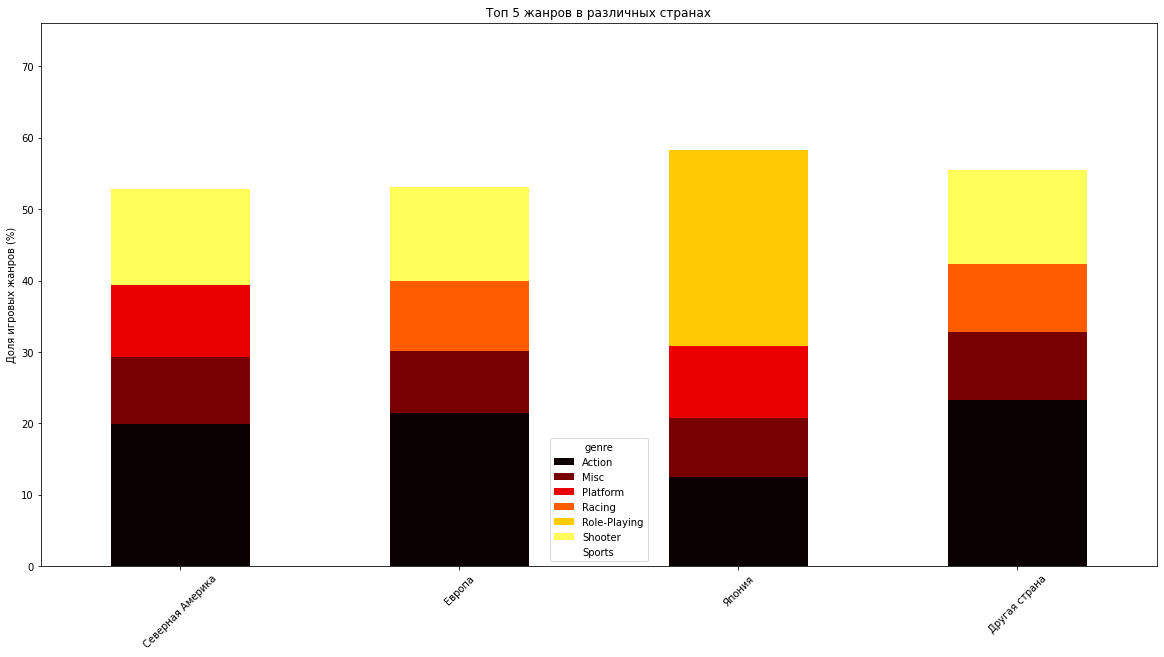

In [52]:
# Визуализируем эту статистику
for_visualize.T.plot(kind='bar', 
                    figsize=(20,10),
                    stacked=True,
                    colormap= 'hot')


plt.title('Топ 5 жанров в различных странах')
plt.ylabel('Доля игровых жанров (%)')
locs, _ = plt.xticks()
plt.xticks(locs,['Северная Америка', 'Европа', 'Япония', 'Другая страна'], rotation=45)
plt.show()

In [53]:
# Влияет ли рейтинг ESRB на продажи в отдельном регионе?
group_rating = data[
    ~data.rating.isnull()
    ].pivot_table(index='rating',
                  values=places,
                  aggfunc='sum')
common_sums = group_rating.sum()

In [54]:
group_rating = group_rating / common_sums * 100

In [55]:
group_rating

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
-1,25.299694,64.896635,28.193620,19.083969
AO,0.025164,0.000000,0.028633,0.011375
E,29.299050,15.270477,29.382330,29.595319
E10+,7.776779,3.098648,8.028960,9.296800
EC,0.004538,0.000000,0.034768,0.013902
K-A,0.011138,0.112538,0.058174,0.003792
M,19.964606,4.951670,17.008706,22.382589
RP,0.003300,0.000000,0.000000,0.001264
T,17.615732,11.670033,17.264809,19.610990


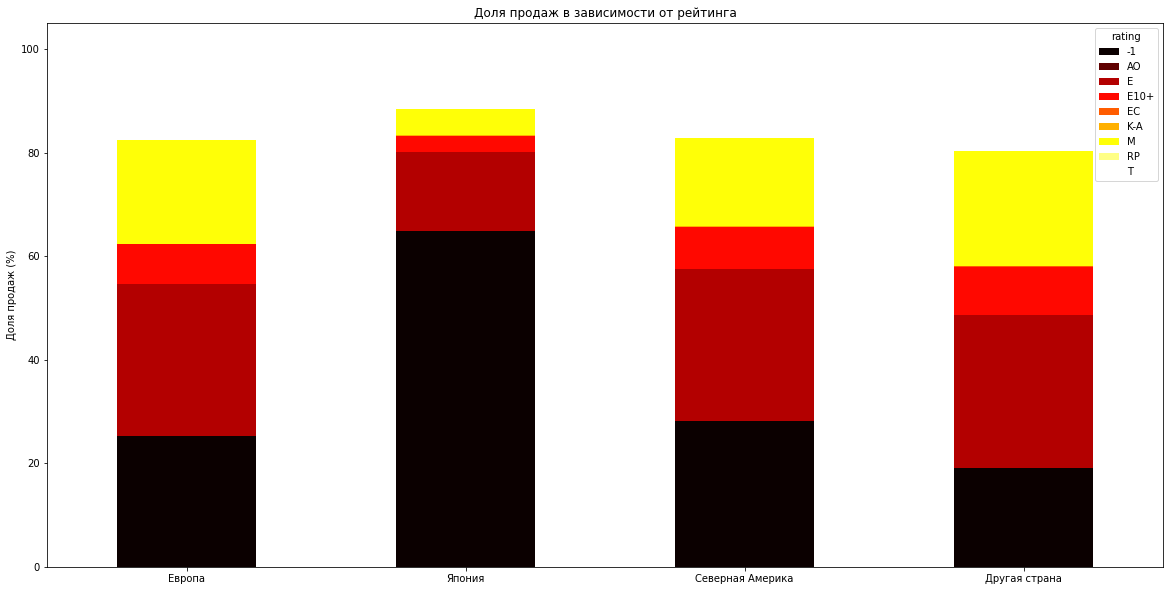

In [56]:
# Визуализируем эту статистику
group_rating.T.plot(kind='bar',
                       figsize=(20,10),
                       stacked=True,
                       colormap= 'hot')


plt.title('Доля продаж в зависимости от рейтинга')
plt.ylabel('Доля продаж (%)')
locs, _ = plt.xticks()
plt.xticks(locs,['Европа', 'Япония', 'Северная Америка',  'Другая страна'],
           rotation=0)
plt.show()

### Вывод

<a name="4.1."></a>
Геймеры по всему миру предпочитают пользоваться настольными компьютерами для игр. Япония является единственной страной со своей спецификой. Там большей популярностью пользуются портативные консоли. Наиболее популярными жанрами по всему миру являются action, музыкальные и спортивные игры. В Японии пользуется популярностью игры в жанре Adventure, в то время как в Европе геймеры отдают предпочтение играм в жанре Racing. <br>

<font size="2">([Назад](#0.0))</font>

<a name="5."></a>
# Шаг 5. Проверка гипотез

<font size="2">([Назад](#0.0))</font>

###### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; <br>
Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC разные;

In [57]:
actual_platforms = actual_platforms.dropna(subset = ['user_score'])

In [58]:
alpha = .05

results = st.ttest_ind(
    actual_platforms.query('platform == "XOne"')['user_score'],
    actual_platforms.query('platform == "PC"')['user_score'],
    equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value:  0.05619765758385681
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза подтвердилась. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

###### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.


Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые. <br>
Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [59]:
alpha = .05

results = st.ttest_ind(
    actual_platforms.query('genre == "Action"')['user_score'],
    actual_platforms.query('genre == "Sports"')['user_score'],
    equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value:  0.0020018209559324713
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports разные.

# Шаг 6. Общие выводы

<a name="6."></a>

Было необходимо проанализировать данные из двумерной таблцы (16715 x 11), предположить причины возникновения пропусков (наибольшее количество пропусков есть в столбцах “Critic_Score” и “Rating”. Должно быть, что это связано с тем, что не для всех игр была возможность сформировать рейтинг, так как старые игры потеряли свою актуальность и не пользуются большим спросом у геймеров, а вновь вышедшие игры ещё не успели получить обзор от критиков. Также, можно отметить, что большое количество нулевых значений обнаружено в столбце с количеством проданных копий. 

Мы выяснили, что в наших данных есть 11560 уникальных названий игр. Остальные строки являются повторами, так игры выходят на различных платформах. Было удалено две строки, в которых были игры без названия. 

Медианное время жизни платформы составляет около 10 лет. К 2016 году заметно потеряли свою популярность такие платформы как Xbox360, Wii, DS, PS3, в то время как PS4 увеличила свои продажи. Можно заметить, что жизненный цикл портативных платформ отличается в меньшую сторону (Nintendo 3ds, PSP, PS vita, wiiU) и не стоит рассчитывать, что к этим девайсам вернётся популярность в будущем. Конкурентоспособными платформами являются PS4, 3ds, xbox one, PC, wiiU. Наиболее популярной платформой на тот момент является PS4, именно ей стоит уделить особое внимание во время анализа. 

Геймеры по всему миру предпочитают пользоваться настольными компьютерами для игр. Япония является единственной страной со своей спецификой. Там большей популярностью пользуются портативные консоли. Наиболее популярными жанрами по всему миру являются action, музыкальные и спортивные игры. В Японии пользуется популярностью игры в жанре Adventure, в то время как в Европе геймеры отдают предпочтение играм в жанре Racing. 

Для проверки гипотез будет использоваться стандартный t-тест. 

**Гипотеза 1.** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; <br>
Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; <br>
Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC разные;<br>
p-value:  0.05619765758385681<br>
Не получилось отвергнуть нулевую гипотезу<br>
**Нулевая гипотеза подтвердилась. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**<br>
<br>
**Гипотеза 2.** Средние пользовательские рейтинги жанров Action и Sports разные.<br>
Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые. <br>
Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports разные.<br>
p-value:  0.0020018209559324713<br>
**Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports разные.**<br>
<br>
Потенциально выгодно разработать игру для рынка Европы и Америки на для PS4 либо Xbox One в жанре Shooter/Action. Японский рынок отличается своей спецификой и предпочтениями среди геймеров. При разработке игры для этого сегмента нужно обратить внимание на портативные консоли и игры в жанре RPG. 

<font size="2">([Назад](#0.0))</font>